# Importing Libraries

Importing the libraries that will be used in the procedures below

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [2]:
#Get sklearn version

import sklearn
sklearn.__version__

#!pip install --upgrade scikit-learn


'1.2.2'

# Importing Dataset

Using pandas read_csv function to load the dataset used in this work

In [3]:
df = pd.read_csv('weatherAUS.csv')
df.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


# Using info and is null function

In order to discover  number of entries, datatype, columns quantity and columns with no data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [5]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

# Unique Values

Check the unique values in order to see if there is any "High Cardinality" in the columns

In [6]:
df.nunique()

Date             3436
Location           49
MinTemp           389
MaxTemp           505
Rainfall          681
Evaporation       358
Sunshine          145
WindGustDir        16
WindGustSpeed      67
WindDir9am         16
WindDir3pm         16
WindSpeed9am       43
WindSpeed3pm       44
Humidity9am       101
Humidity3pm       101
Pressure9am       546
Pressure3pm       549
Cloud9am           10
Cloud3pm           10
Temp9am           441
Temp3pm           502
RainToday           2
RainTomorrow        2
dtype: int64

The columns Date seems to have 'High Cardinality' and it will be checked

# Organizing columns

Doing some modifications in the columns such as:

*/Droping the columns 'RainTomorrow'\
*/Create the objects to organize the columns in numerical, categorical and date\
*/


In [7]:
df = df.dropna(subset=['RainTomorrow'])

In [8]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [9]:
numerical = df.select_dtypes(include=['float64'])
categorical = df.select_dtypes(include=['object'])
date = df.select_dtypes(include=['datetime64'])

num_col = numerical.columns.tolist()
cat_col = categorical.columns.tolist()

num_array = numerical.to_numpy()
cat_array = categorical.to_numpy()

num_col

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

# Defining variables X, y (independent and dependent)

Creating the objects the will contain the inputs and targets

In [33]:
X = df.drop(['Date', 'RainTomorrow'], axis=1)
y = df['RainTomorrow']

X.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday'],
      dtype='object')

# Spliting the dataset in train and test

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Pipeline: definition of columns and features used in the steps

In both numerical and categorical data

In [35]:
#Numerical Transfomation Pipelines

num_features = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am',\
                'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',\
                'Temp9am', 'Temp3pm']

#num_features = num_col

num_pipe = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')), ('scaler', StandardScaler())])

#num_pipe.fit(df)

In [40]:
#Categorical Transformation Pipelines

cat_features = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

#cat_features = 

cat_transform = Pipeline(steps=[('one-hot-encoder', OneHotEncoder(handle_unknown='ignore'))])

# Pipeline preprocessor

Creating the object used in the model function

In [41]:
#Componding the preprocessors

#preprocessor = ColumnTransformer(transformers=[('num', num_transform, num_array, num_col), ('cat', cat_transform, cat_array, cat_col)])

preprocessor = ColumnTransformer(transformers=[('num', num_pipe, num_features), ('cat', cat_transform, cat_features)], remainder='passthrough')

#preprocessor = ColumnTransformer(transformers=[('num', num_transform, num_features)])

In [15]:
#ColumnTransformer to Pandas DataFrame

#pp = pd.DataFrame(preprocessor.fit_transform(df).toarray())

#pp.isnull().sum()

# Creating the model

Create the model using pipeline method

In [42]:
model_pipe = Pipeline(steps=[('preprocessor', preprocessor), \
                             ('tree', DecisionTreeClassifier(max_depth=7, \
                                                        random_state=42, \
                                                        min_samples_split=100, \
                                                        min_samples_leaf=30, \
                                                        criterion='gini'
                                                       ))])

In [43]:
#model2 = Pipeline(steps=[('preprocessor', preprocessor), ('tree', DecisionTreeClassifier())])

model_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['MinTemp', 'MaxTemp',
                                                   'Rainfall', 'Evaporation',
                                                   'Sunshine', 'WindGustSpeed',
                                                   'WindSpeed9am',
                                                   'WindSpeed3pm',
                                                   'Humidity9am', 'Humidity3pm',
                                                   'Pressure9am', 'Pressure3pm',
                                                   'Cloud9am', 'Cloud3pm',
                                                   'Temp9am', 'Temp3pm']),
                                                 ('cat',
                                                  Pipeline(steps=[('one-hot-encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Location', 'WindGustDir',
                                                   'WindDir9am', 'WindDir3pm',
                                                   'RainToday'])])),
                ('tree',
                 DecisionTreeClassifier(max_depth=7, min_samples_leaf=30,
                                        min_samples_split=100,
                                        random_state=42))])

In [19]:
#fig = plt.figure(figsize=(25,20))
#plot_tree(model_pipe)

# Training the model and making the predictor

In [ ]:
# treinando o modelo
#model.fit(X_train, y_train)

In [44]:
predictor = model_pipe.predict(X_test)
predictor

array(['Yes', 'No', 'No', ..., 'No', 'Yes', 'No'], dtype=object)

# Evaluation
Main metrics used for Classification Models

In [45]:
#Importing the functions used in the evaluation methods

from sklearn.metrics import accuracy_score, \
                            recall_score, \
                            f1_score, \
                            precision_score, \
                            confusion_matrix, \
                            RocCurveDisplay, \
                            PrecisionRecallDisplay, \
                            ConfusionMatrixDisplay
import sklearn.metrics

In [46]:
print('Train Set Score: %0.4f' % model_pipe.score(X_train, y_train))
print('Accuracy Score: %0.4f' % accuracy_score(y_test, predictor))
print('Precision Score: %0.4f' % precision_score(y_test, predictor, average='macro'))
print('Recall Score: %0.4f' % recall_score(y_test, predictor, average='macro'))
print('F1 Score: %0.4f' % f1_score(y_test, predictor, average='macro'))


Train Set Score: 0.8454
Accuracy Score: 0.8377
Precision Score: 0.7921
Recall Score: 0.6938
F1 Score: 0.7227


Values Using the columns 'Date' to see the cardinality:

Train Set Score: 0.8454 \
Accuracy Score: 0.8377 \
Precision Score: 0.7921 \
Recall Score: 0.6938 \
F1 Score: 0.7227

In [23]:
f1_score(y_test, predictor, average=None)

array([0.9013004, 0.5441254])

Accuracy Score: Inpute the comments \
Precision Score: \
Recall Score: \
F1 Score:

# Confusion Matrix

In [24]:
conf_matrix = confusion_matrix(y_test, predictor)
print('Confusion Matrix:\n')
print(conf_matrix)

Confusion Matrix:

[[31605  1528]
 [ 5394  4131]]


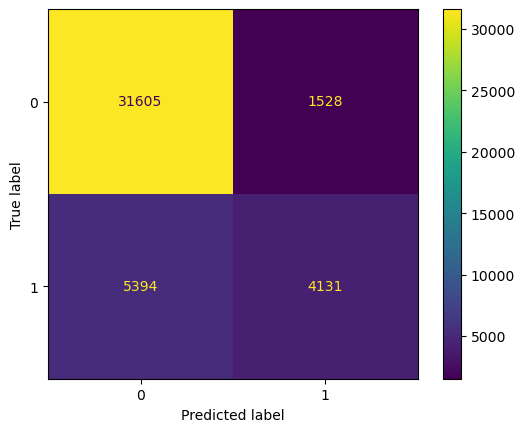

In [25]:
conf_matrix_chart = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
conf_matrix_chart.plot()

Confusion Matrix:

True Positive / False Positive \
False Negative / True Negative

# ROC/AUC Curve
Projection of ROC/AUC metric in a curve

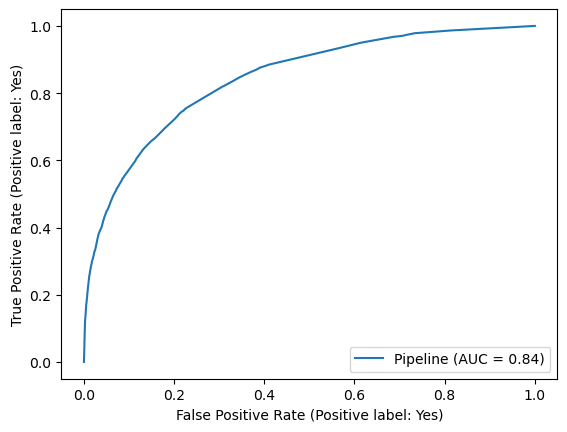

In [26]:
RocCurveDisplay.from_estimator(model_pipe, X_test, y_test)

# Precision Recall

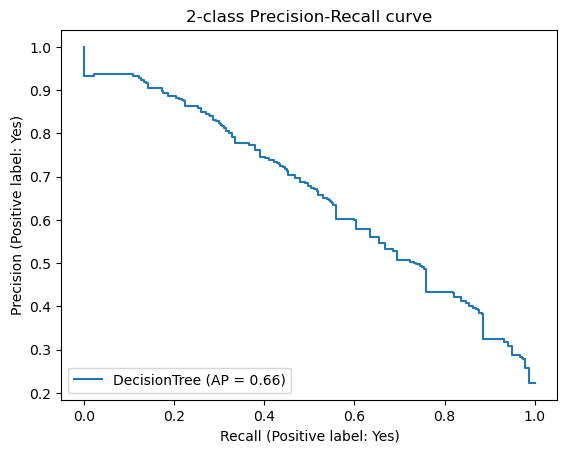

In [27]:
display = PrecisionRecallDisplay.from_estimator(
    model_pipe, X_test, y_test, name="DecisionTree")
_ = display.ax_.set_title("2-class Precision-Recall curve")

# Cross Validation
Use of KFold to perform a cross validation analisys

In [28]:
from sklearn.model_selection import cross_val_score

cv_acc = cross_val_score(model_pipe, X_train, y_train, cv = 5, scoring='accuracy')
print("%0.4f accuracy with a standard deviation of %0.4f" % (cv_acc.mean(), cv_acc.std()))

0.8402 accuracy with a standard deviation of 0.0025


In [29]:
cv_f1 = cross_val_score(model_pipe, X_train, y_train, cv = 5, scoring='f1_macro')
print("%0.4f accuracy with a standard deviation of %0.4f" % (cv_f1.mean(), cv_f1.std()))

0.7314 accuracy with a standard deviation of 0.0047


# Hyper-parameter Optimization
Try to optimizate the model with the GridSearchCV